# Instacart Data Part.2 EDA

## REMARK:  

#### Please give consideration of late submission due to following: 

#### From this part of the project, I wanted to revisit my learnings from the course. I was hard time keeping up with materials, and needed extra time to revamp coding skills. I dove deeper on each topics, practiced different exercises online, and spent a lot of times to fully understand each Unit in order to complete this task. I especially concentrated on understanding different types of regressions and applying right techniques to build predictive models.  

####  In conclusion, I am now in a place where I comprehend Data Science as a big picture. I clearly see the purpose of EDA, and comfortable doing so. I practiced using different functions and libraries until I obtained the style that I am most comfortable with. 

## 1. Data Collection

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette('Blues')

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
from subprocess import check_output
print(check_output(["ls", "./data"]).decode("utf8"))

aisles.csv
departments.csv
order_products__prior.csv
order_products__train.csv
orders.csv
products.csv



In [4]:
order_products_train = pd.read_csv("./data/order_products__train.csv")
order_products_prior = pd.read_csv("./data/order_products__prior.csv")
orders = pd.read_csv("./data/orders.csv")
products = pd.read_csv("./data/products.csv")
aisles = pd.read_csv("./data/aisles.csv")
departments = pd.read_csv("./data/departments.csv")

## 2. Data Observation and Cleaning


#### I want to check how data is structured and information is usable. I am checking null values to see if there is any cleaning necessary before exploring the data.

### orders

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [6]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

##### days_since_prior_order is expecting 206,209 NAs since it indicates the user did not reorder on Instacart

In [8]:
# Checking total numbers of order_id for total orders

print(f'there are {len(orders)} orders')

there are 3421083 orders


In [9]:
# eval_set is marked as: 
#   prior: orders prior to that users most recent order 
#   train: training data supplied to participants
#   test: test data reserved for machine learning competitions


orders.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [10]:
orders.shape

(3421083, 7)

#### From exploring above data, we can observe information on each orders, which is classified with evaluation set, and able to pivot ordering behavior by users with ordering time information using dow, hour_of_day.


#### Let's explore order_products_train.csv and order_products_prior.csv 

#### ordrer_products_train

In [11]:
order_products_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [12]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [13]:
order_products_train.count()

order_id             1384617
product_id           1384617
add_to_cart_order    1384617
reordered            1384617
dtype: int64

In [14]:
order_products_train.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

#### order_products_prior

In [15]:
order_products_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [16]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [17]:
order_products_prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

#### products

In [18]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [19]:
products = pd.read_csv("./data/products.csv")

In [20]:
# Checking total numbers of product_id

print(f'there are {len(products)} products with aisle_id and department_id')

there are 49688 products with aisle_id and department_id


In [21]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [22]:
products.shape

(49688, 4)

#### aisles

In [23]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [24]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


#### Since products and aisles are related tables based on aisle_id, I will merge them together

In [25]:
products = pd.merge(aisles, products, on="aisle_id")
products.head()

,aisle_id,aisle,product_id,product_name,department_id
0,1,prepared soups salads,209,Italian Pasta Salad,20
1,1,prepared soups salads,554,Turkey Chili,20
2,1,prepared soups salads,886,Whole Grain Salad with Roasted Pecans & Mango ...,20
3,1,prepared soups salads,1600,Mediterranean Orzo Salad,20
4,1,prepared soups salads,2539,Original Potato Salad,20


#### departments

In [26]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [27]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


#### merging departments and prodcuts together as well

In [28]:
products = pd.merge(departments, products, on="department_id")

In [29]:
products.head()

,department_id,department,aisle_id,aisle,product_id,product_name
0,1,frozen,34,frozen meat seafood,118,Ground Turkey Chub
1,1,frozen,34,frozen meat seafood,383,Breaded Chicken Breast Tenders
2,1,frozen,34,frozen meat seafood,402,100% Pure Beef Homestyle Patties
3,1,frozen,34,frozen meat seafood,625,"Chicken Breast Nuggets, Dinosaur Shaped"
4,1,frozen,34,frozen meat seafood,831,All Natural Premium Cornish Hen


### All of our dataset looks clean. Now, I want to merge products dataframe to the prior and train dataframe in order to explore further in details with product information for the next part of project

In [30]:
products_prior = pd.merge(order_products_prior, products, on="product_id")
products_prior.head()

,order_id,product_id,add_to_cart_order,reordered,department_id,department,aisle_id,aisle,product_name
0,2,33120,1,1,16,dairy eggs,86,eggs,Organic Egg Whites
1,26,33120,5,0,16,dairy eggs,86,eggs,Organic Egg Whites
2,120,33120,13,0,16,dairy eggs,86,eggs,Organic Egg Whites
3,327,33120,5,1,16,dairy eggs,86,eggs,Organic Egg Whites
4,390,33120,28,1,16,dairy eggs,86,eggs,Organic Egg Whites


In [31]:
products_train = pd.merge(order_products_train, products, on="product_id")
products_train.head()

,order_id,product_id,add_to_cart_order,reordered,department_id,department,aisle_id,aisle,product_name
0,1,49302,1,1,16,dairy eggs,120,yogurt,Bulgarian Yogurt
1,816049,49302,7,1,16,dairy eggs,120,yogurt,Bulgarian Yogurt
2,1242203,49302,1,1,16,dairy eggs,120,yogurt,Bulgarian Yogurt
3,1383349,49302,11,1,16,dairy eggs,120,yogurt,Bulgarian Yogurt
4,1787378,49302,8,0,16,dairy eggs,120,yogurt,Bulgarian Yogurt


#### Finally, prodcuts_prior table can be merged with orders dataframe by using order_id, so we can gain more insight on order details 

In [32]:
products_and_orders = pd.merge(products_prior, orders, on='order_id')
products_and_orders.head()

,order_id,product_id,add_to_cart_order,reordered,department_id,department,aisle_id,aisle,product_name,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,16,dairy eggs,86,eggs,Organic Egg Whites,202279,prior,3,5,9,8.0
1,2,28985,2,1,4,produce,83,fresh vegetables,Michigan Organic Kale,202279,prior,3,5,9,8.0
2,2,9327,3,0,13,pantry,104,spices seasonings,Garlic Powder,202279,prior,3,5,9,8.0
3,2,45918,4,1,13,pantry,19,oils vinegars,Coconut Butter,202279,prior,3,5,9,8.0
4,2,30035,5,0,13,pantry,17,baking ingredients,Natural Sweetener,202279,prior,3,5,9,8.0


In [33]:
products_and_orders.tail()

,order_id,product_id,add_to_cart_order,reordered,department_id,department,aisle_id,aisle,product_name,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
32434484,1666202,47680,1,0,5,alcohol,28,red wines,Indian Wells Merlot,189140,prior,2,3,11,20.0
32434485,1699504,34390,1,0,11,personal care,47,vitamins supplements,Fish Oil 1000 mg+300 mg Omega-3 Softgels,182854,prior,10,5,15,2.0
32434486,2666238,31530,1,0,17,household,114,cleaning products,Disinfecting Toilet Bowl Cleaner,51836,prior,12,0,18,0.0
32434487,2770035,39759,1,0,11,personal care,11,cold flu allergy,"Indoor & Outdoor Allergies, Allergy & Congesti...",37237,prior,50,6,16,2.0
32434488,3326955,46404,1,0,2,other,6,other,Cotes De Provence Rose,132609,prior,7,3,15,2.0


## 3. Data Exploration

In [34]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [35]:
orders.groupby('eval_set')['user_id'].count()

eval_set
prior    3214874
test       75000
train     131209
Name: user_id, dtype: int64

In [36]:
total_orders_customer=orders.groupby('user_id')['order_number'].count().reset_index()
total_orders_customer.head()

#reset_index is to create a dataframe for pivot purpose

,user_id,order_number
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5


In [37]:
total_orders_customer.count()

user_id         206209
order_number    206209
dtype: int64

In [38]:
total_orders_customer['order_number'].value_counts()

4     23986
5     19590
6     16165
7     13850
8     11700
      ...  
94       57
91       56
97       54
98       50
99       47
Name: order_number, Length: 97, dtype: int64

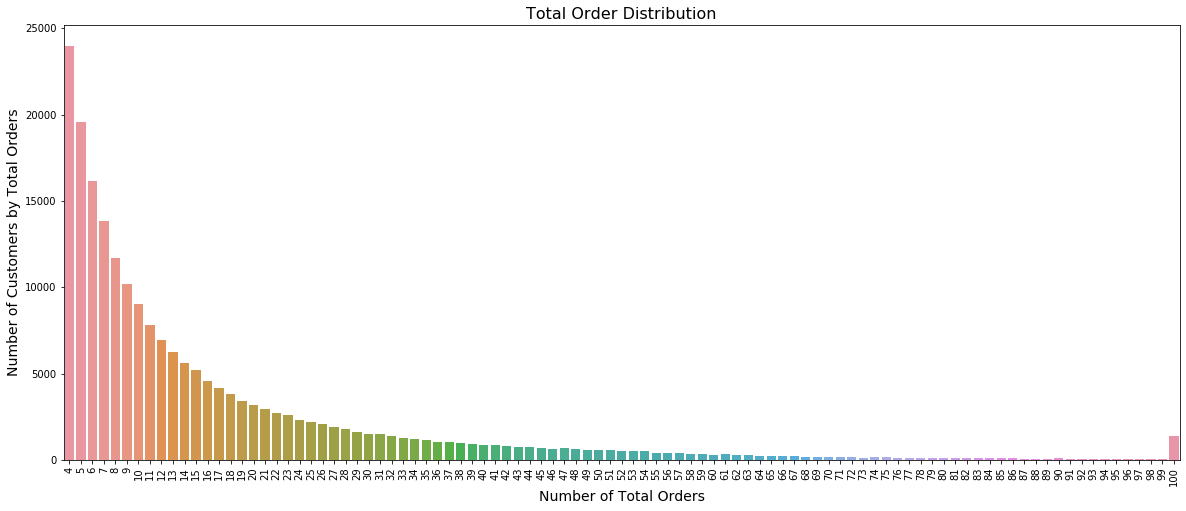

In [39]:
plt.figure(figsize=(20,8))
sns.countplot(total_orders_customer['order_number'])
plt.title('Total Order Distribution', fontsize=16)
plt.ylabel('Number of Customers by Total Orders', fontsize=14)
plt.xlabel('Number of Total Orders', fontsize=14)
plt.xticks(rotation='vertical');

#### There are no orders less than 4, and number of total_orders is capped at 100

Text(0.5, 0, 'Day of the Week')

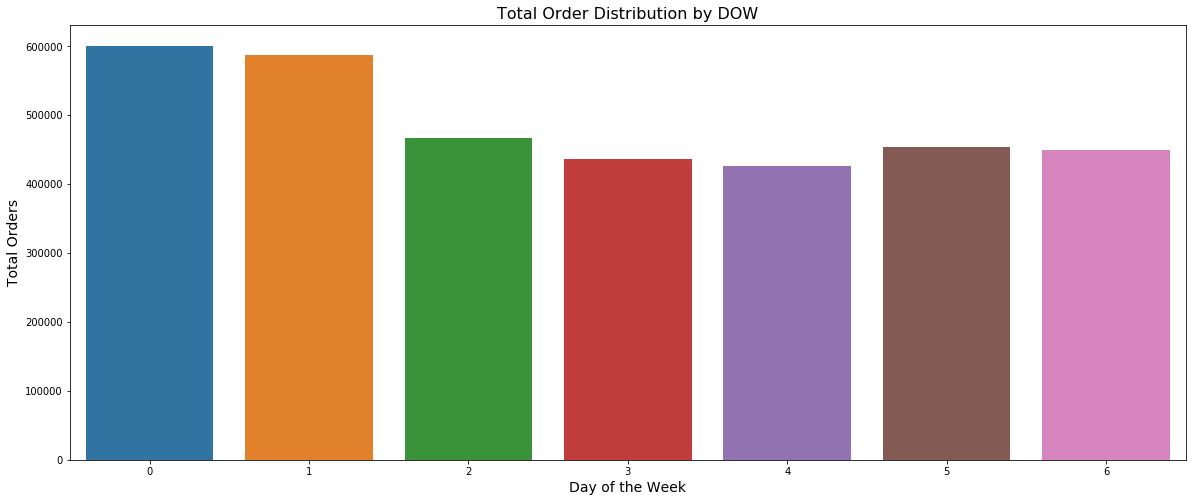

In [40]:
plt.figure(figsize=(20,8))
sns.countplot(orders['order_dow'])
plt.title("Total Order Distribution by DOW", fontsize=16)
plt.ylabel("Total Orders", fontsize=14)
plt.xlabel("Day of the Week", fontsize=14)

#### 0 = Sunday <br><br> Sunday and Monday has the most orders. Lowest on Thursday (4)

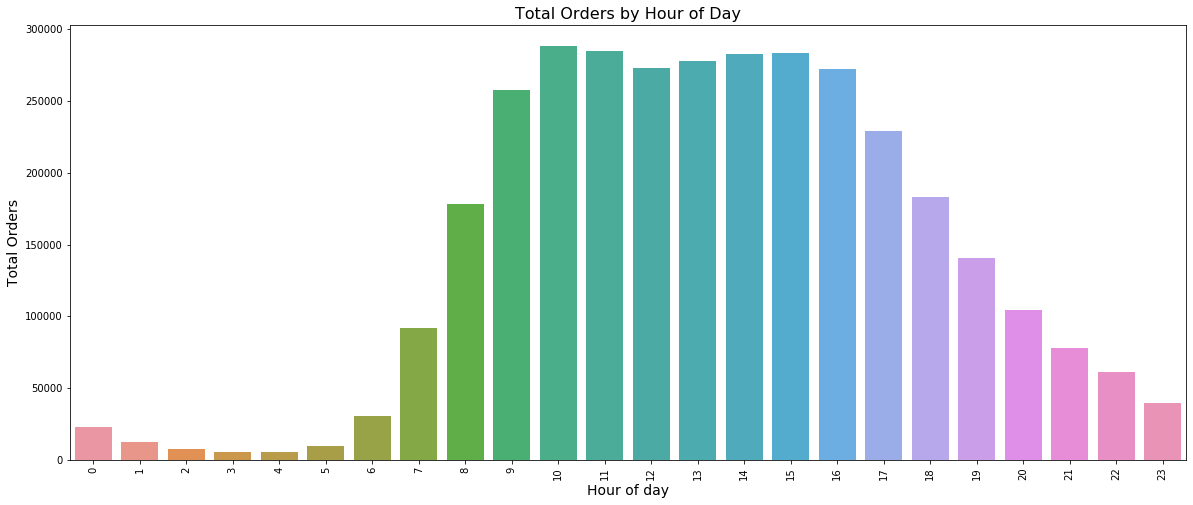

In [41]:
plt.figure(figsize=(20,8))
sns.countplot(orders['order_hour_of_day'])
plt.title("Total Orders by Hour of Day", fontsize=16)
plt.ylabel('Total Orders', fontsize=14)
plt.xlabel('Hour of day', fontsize=14)
plt.xticks(rotation='vertical')

plt.show()

#### Based on the histogram above, order_volumes are concentrated between 10 am to 4pm. 

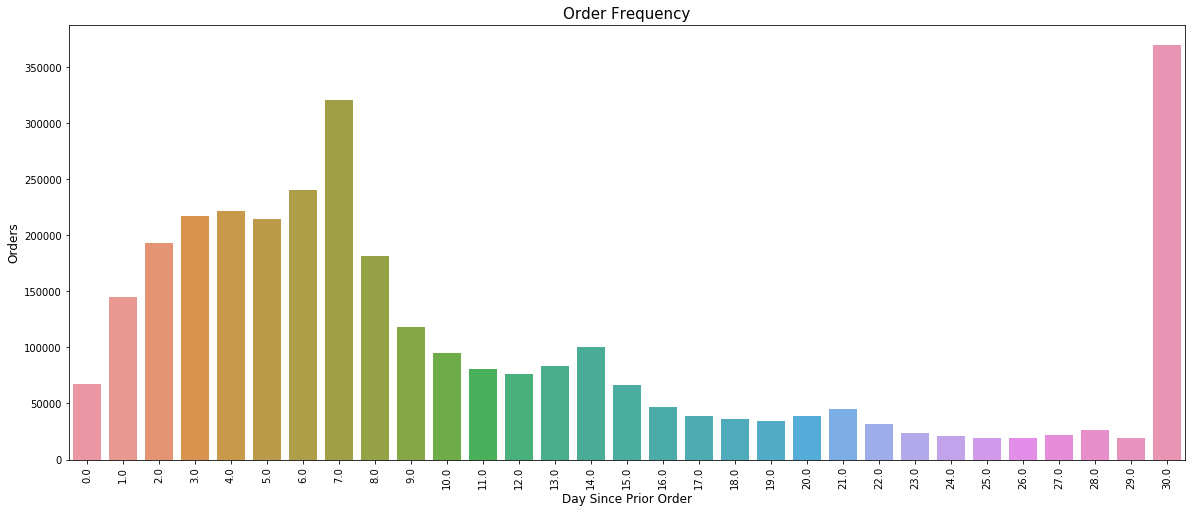

In [208]:
plt.figure(figsize=(20,8))
sns.countplot(orders['days_since_prior_order'])
plt.title("Order Frequency", fontsize=15)
plt.ylabel('Orders', fontsize=12)
plt.xlabel('Day Since Prior Order', fontsize=12)
plt.xticks(rotation='vertical');

#### Order Frequency is concentrated on Day 0 to 7 (weekly basis), which can be indicated as power users. There is some upticks at day-14 and 21 who are weekly seasonal buyers

In [211]:
products_prior.head()

,order_id,product_id,add_to_cart_order,reordered,department_id,department,aisle_id,aisle,product_name
0,2,33120,1,1,16,dairy eggs,86,eggs,Organic Egg Whites
1,26,33120,5,0,16,dairy eggs,86,eggs,Organic Egg Whites
2,120,33120,13,0,16,dairy eggs,86,eggs,Organic Egg Whites
3,327,33120,5,1,16,dairy eggs,86,eggs,Organic Egg Whites
4,390,33120,28,1,16,dairy eggs,86,eggs,Organic Egg Whites


In [49]:
total_product_in_cart = products_prior.groupby("order_id")["add_to_cart_order"].count().reset_index()
total_product_in_cart.head()

,order_id,add_to_cart_order
0,2,9
1,3,8
2,4,13
3,5,26
4,6,3


In [221]:
# checking to see if above dataframe is correct

products_prior.loc[products_prior['order_id']==2]

,order_id,product_id,add_to_cart_order,reordered,department_id,department,aisle_id,aisle,product_name
0,2,33120,1,1,16,dairy eggs,86,eggs,Organic Egg Whites
19400,2,28985,2,1,4,produce,83,fresh vegetables,Michigan Organic Kale
86849,2,9327,3,0,13,pantry,104,spices seasonings,Garlic Powder
93148,2,45918,4,1,13,pantry,19,oils vinegars,Coconut Butter
93892,2,30035,5,0,13,pantry,17,baking ingredients,Natural Sweetener
94461,2,17794,6,1,4,produce,83,fresh vegetables,Carrots
167197,2,40141,7,1,13,pantry,105,doughs gelatins bake mixes,Original Unflavored Gelatine Mix
168386,2,1819,8,1,13,pantry,88,spreads,All Natural No Stir Creamy Almond Butter
170810,2,43668,9,0,4,produce,123,packaged vegetables fruits,Classic Blend Cole Slaw


Text(0, 0.5, 'Total Number of Orders')

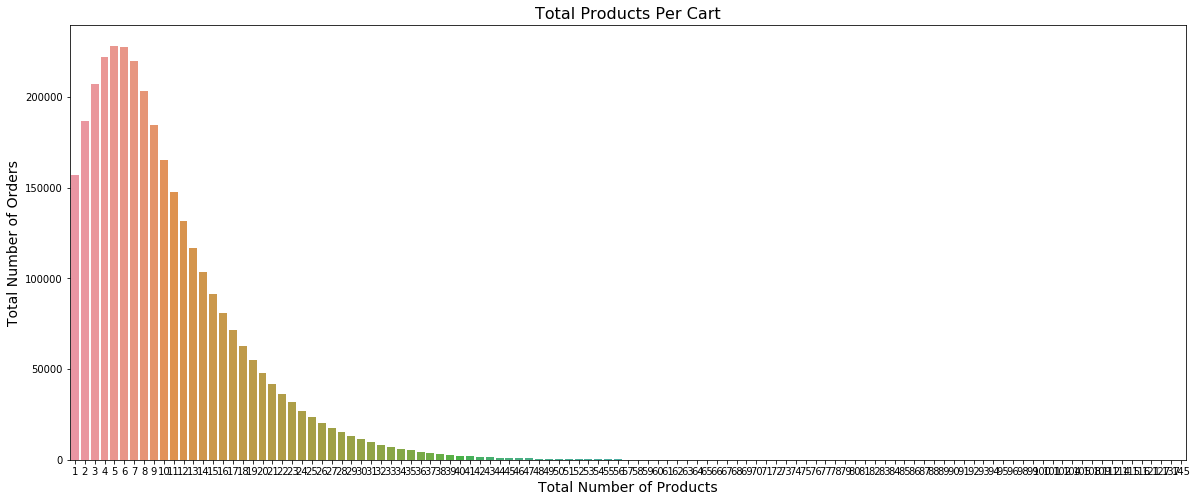

In [53]:
plt.figure(figsize=(20,8))
sns.countplot(total_product_in_cart["add_to_cart_order"])
plt.title("Total Products Per Cart", fontsize =16)
plt.xlabel("Total Number of Products", fontsize=14)
plt.ylabel("Total Number of Orders", fontsize=14)

#### we can see that majority of carts contain about 4~7 products per order. 

#### Now let's see what type of products are popular amongst customers. I created products_prior dataframe that is merged with products, aisles, and department information. 

In [54]:
products_prior.head()

,order_id,product_id,add_to_cart_order,reordered,department_id,department,aisle_id,aisle,product_name
0,2,33120,1,1,16,dairy eggs,86,eggs,Organic Egg Whites
1,26,33120,5,0,16,dairy eggs,86,eggs,Organic Egg Whites
2,120,33120,13,0,16,dairy eggs,86,eggs,Organic Egg Whites
3,327,33120,5,1,16,dairy eggs,86,eggs,Organic Egg Whites
4,390,33120,28,1,16,dairy eggs,86,eggs,Organic Egg Whites


In [65]:
products_prior.shape

(32434489, 9)

In [66]:
order_products_prior.shape

(32434489, 4)

In [83]:
product_count = products_prior.product_name.value_counts().reset_index().head(20)
product_count.columns = ['product_name', 'total_count']
product_count

,product_name,total_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


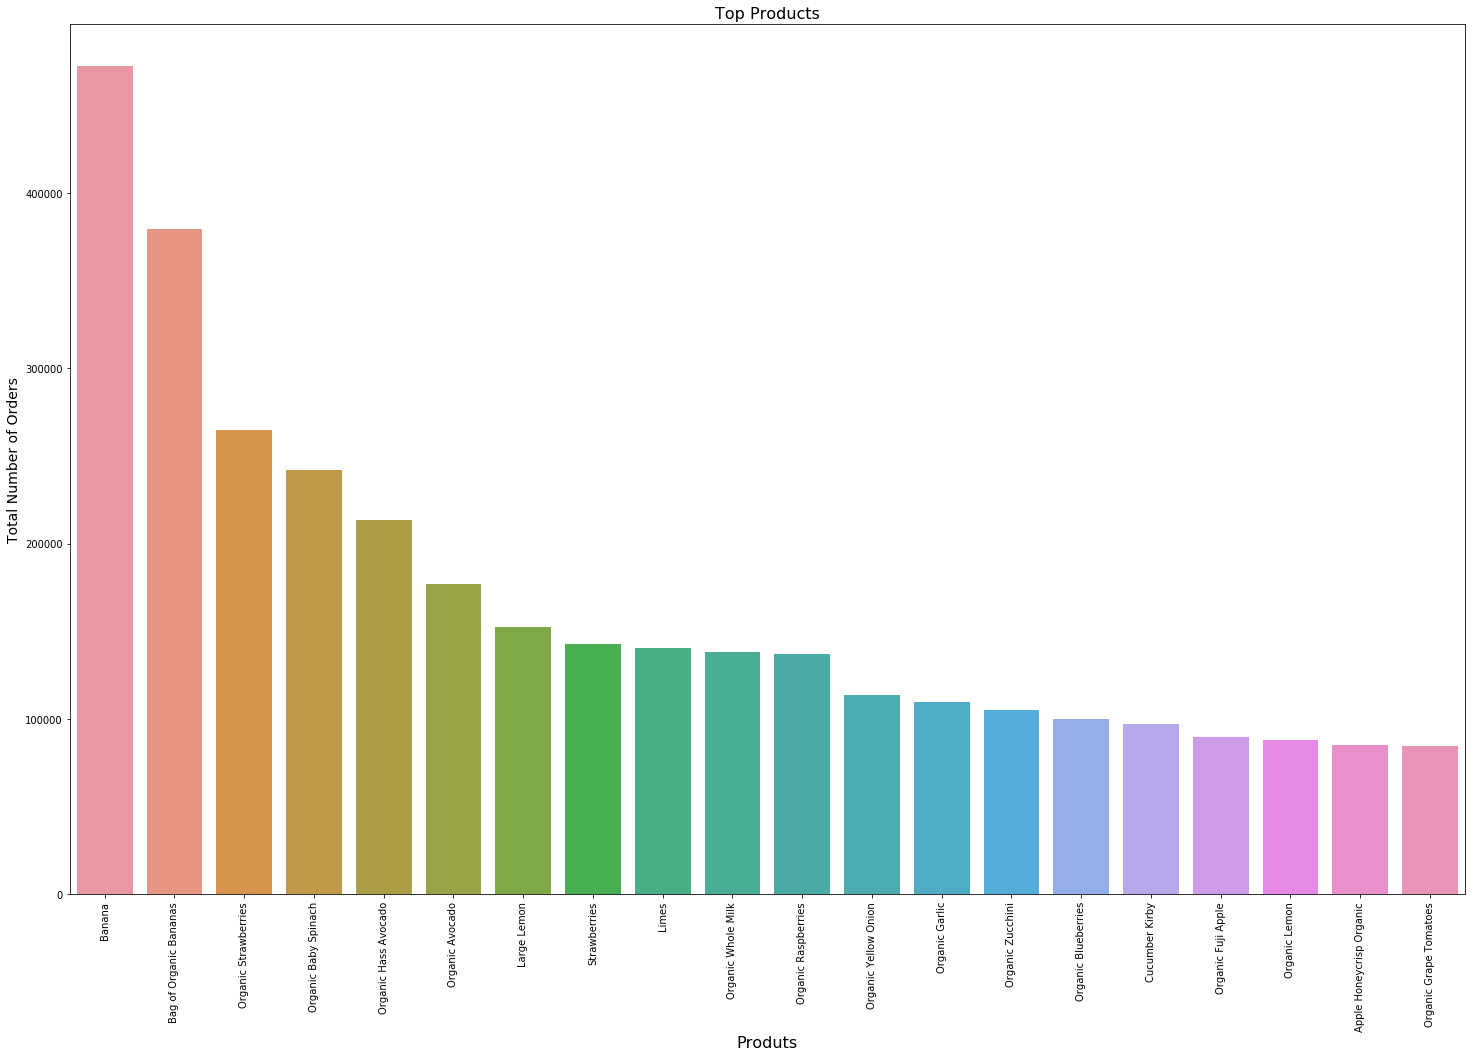

In [98]:
plt.figure(figsize=(25,16))
sns.barplot(x='product_name', y='total_count', data=product_count)
plt.title('Top Products', fontsize =16)
plt.xlabel("Produts", fontsize=16)
plt.ylabel("Total Number of Orders", fontsize=14)
plt.xticks(rotation='vertical');

#### Surprisingly, banana and perishbles seem to be the most popular. Then, let's drill down to aisle and department

In [78]:
aisle_count = products_prior.aisle.value_counts().reset_index().head(20)
aisle_count.columns = ['aisle_name', 'total_count']
aisle_count

,aisle_name,total_count
0,fresh fruits,3642188
1,fresh vegetables,3418021
2,packaged vegetables fruits,1765313
3,yogurt,1452343
4,packaged cheese,979763
5,milk,891015
6,water seltzer sparkling water,841533
7,chips pretzels,722470
8,soy lactosefree,638253
9,bread,584834


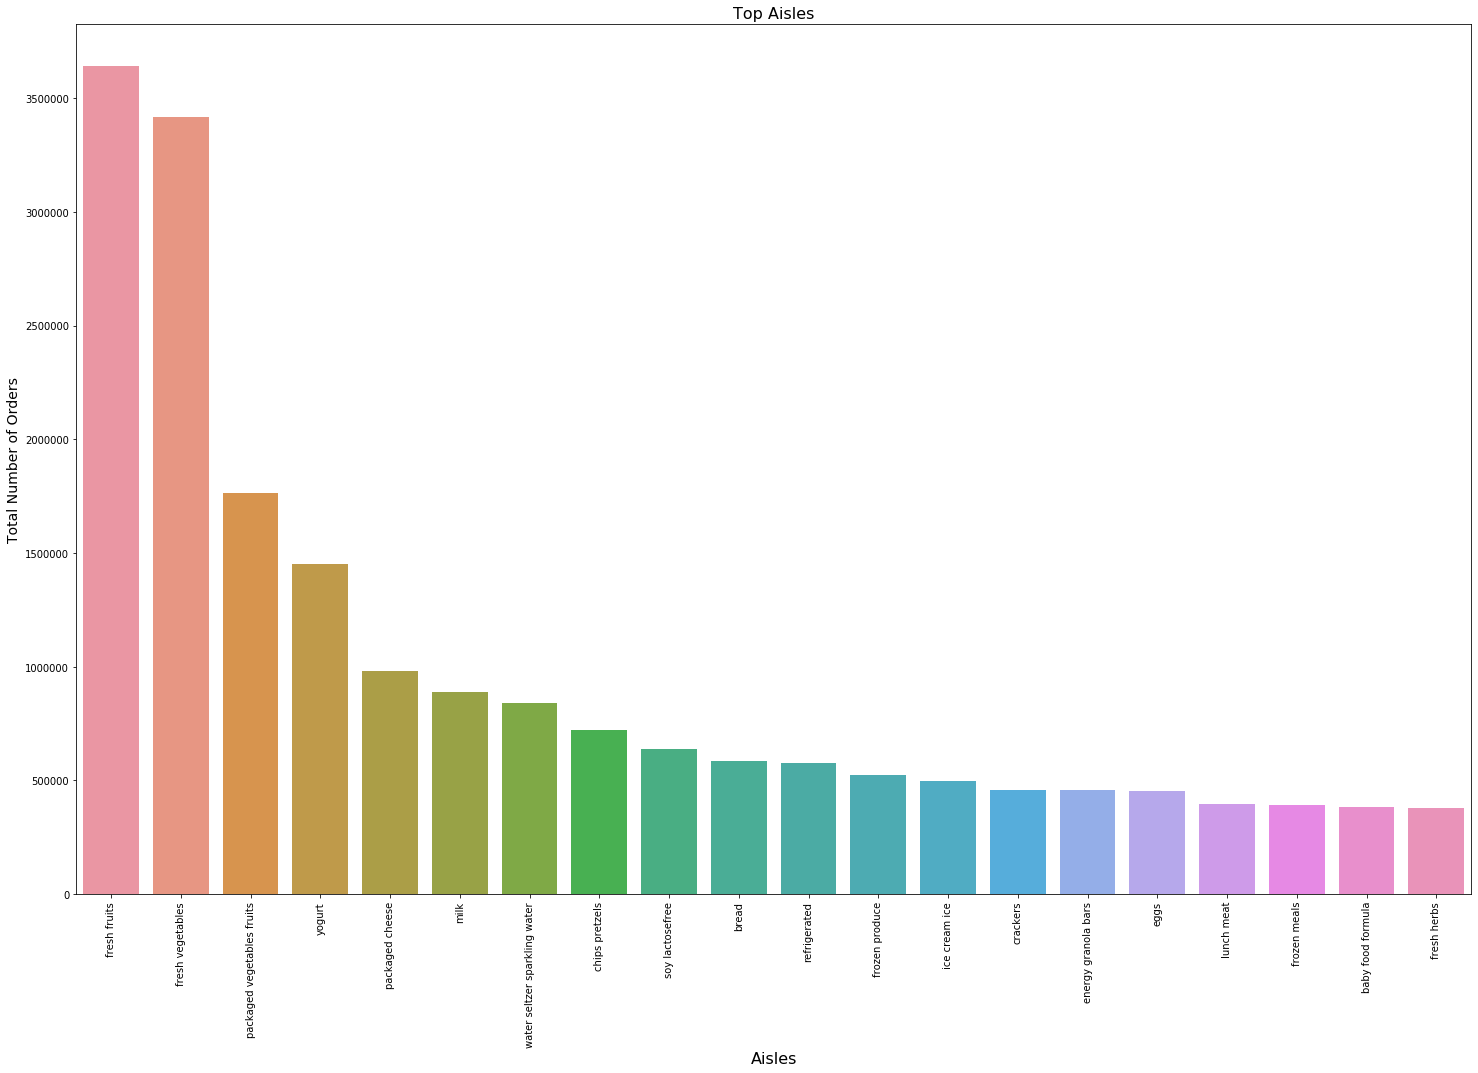

In [101]:
plt.figure(figsize=(25,16))
sns.barplot(x='aisle_name', y='total_count', data=aisle_count)
plt.title('Top Aisles', fontsize =16)
plt.xlabel("Aisles", fontsize=16)
plt.ylabel("Total Number of Orders", fontsize=14)
plt.xticks(rotation='vertical');

In [81]:
department_count = products_prior.department.value_counts().reset_index().head(20)
department_count.columns = ['department_name', 'total_count']
department_count

,department_name,total_count
0,produce,9479291
1,dairy eggs,5414016
2,snacks,2887550
3,beverages,2690129
4,frozen,2236432
5,pantry,1875577
6,bakery,1176787
7,canned goods,1068058
8,deli,1051249
9,dry goods pasta,866627


#### As we guessed based on the proucts sold, top aisles and departments are perishable related